In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string

In [2]:
data=pd.read_excel('/content/HeartDiseasePrediction.xlsx')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,NaN,NaN,106/70,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,NaN,NaN,121/81,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,NaN,NaN,127.5/80,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,NaN,NaN,150/95,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,NaN,NaN,130/84,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,F,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,NaN,NaN,131/72,22.00,84.0,86.0,0.0
4236,F,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,NaN,NaN,126.5/87,19.16,86.0,NaN,0.0
4237,F,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,NaN,NaN,133.5/83,21.47,80.0,107.0,0.0
4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.rename(columns={'male':'gender'},inplace=True)

In [4]:
data.loc[data['gender']=='F','gender']=0
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,NaN,NaN,106/70,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,NaN,NaN,121/81,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,NaN,NaN,127.5/80,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,NaN,NaN,150/95,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,NaN,NaN,130/84,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,NaN,NaN,131/72,22.00,84.0,86.0,0.0
4236,0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,NaN,NaN,126.5/87,19.16,86.0,NaN,0.0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,NaN,NaN,133.5/83,21.47,80.0,107.0,0.0
4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isna().sum()

gender                2
age                   2
education           107
currentSmoker         2
cigsPerDay           31
BPMeds               54
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol              52
sysBP              1687
diaBP              1687
BP                 2555
BMI                  21
heartRate             3
glucose             390
TenYearCHD            2
dtype: int64

In [6]:
data.drop(['sysBP','diaBP','BP'],axis=1,inplace=True)
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,22.00,84.0,86.0,0.0
4236,0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,19.16,86.0,NaN,0.0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,21.47,80.0,107.0,0.0
4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isna().sum()

gender               2
age                  2
education          107
currentSmoker        2
cigsPerDay          31
BPMeds              54
prevalentStroke      2
prevalentHyp         2
diabetes             2
totChol             52
BMI                 21
heartRate            3
glucose            390
TenYearCHD           2
dtype: int64

In [8]:
data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,23.10,85.0,85.0,0.0


In [9]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
data.dtypes

gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

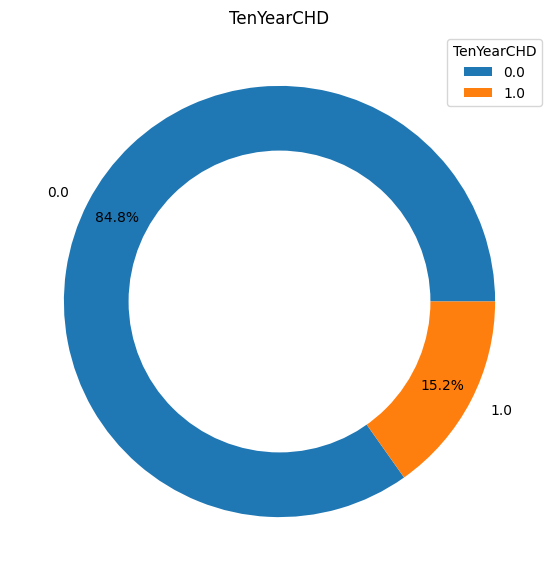

In [11]:
#DonutChart of TenYearCHD
donutdf=pd.DataFrame(data['TenYearCHD'].value_counts())
notice=donutdf.index
numbers=donutdf.values.ravel()
explode=(0.5,0.5)
fig=plt.figure(figsize=(7,7))
fig=plt.pie(numbers,labels=notice,autopct='%1.1f%%',pctdistance=0.85)
centre_circle=plt.Circle((0,0),0.7,fc='White')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('TenYearCHD')
plt.legend(title="TenYearCHD")
plt.show()

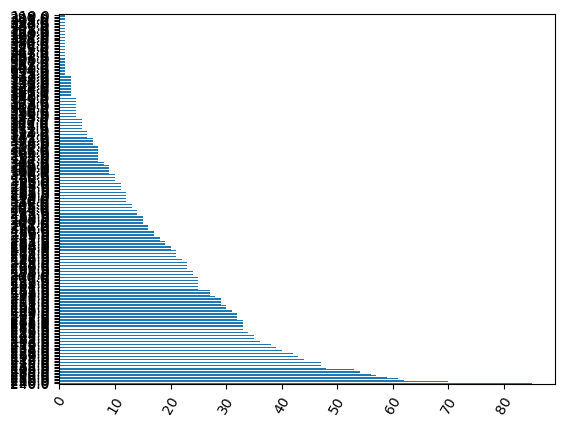

In [12]:
graph=data['totChol'].value_counts()
graph.plot(kind='barh')
plt.xticks(rotation=60)
plt.show()

<Axes: >

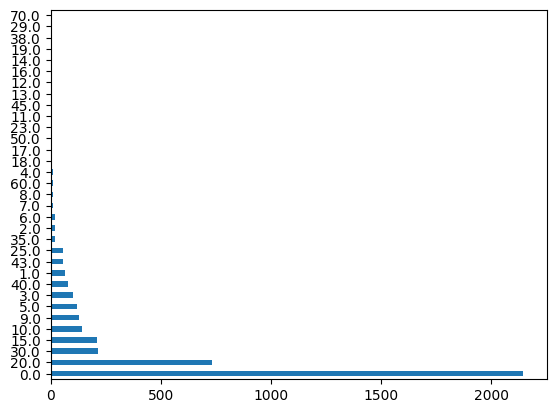

In [13]:
graph=data['cigsPerDay'].value_counts()
graph.plot(kind='barh')

<Axes: >

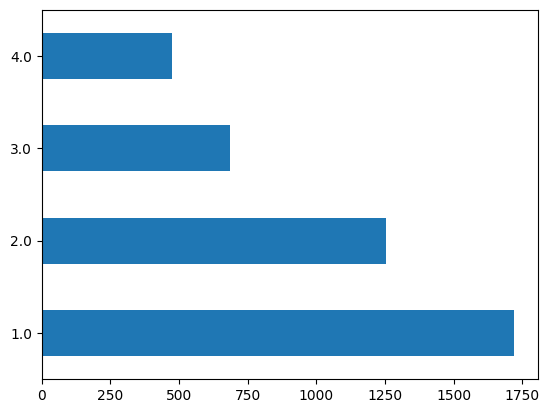

In [14]:
graph=data['education'].value_counts()
graph.plot(kind='barh')

<Axes: >

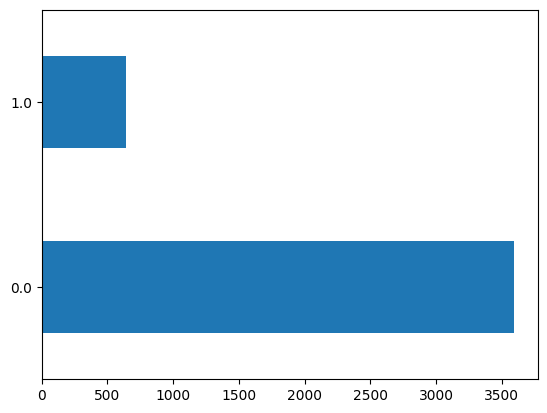

In [15]:
TenyearCHD=data['TenYearCHD'].value_counts()
TenyearCHD.plot(kind='barh')

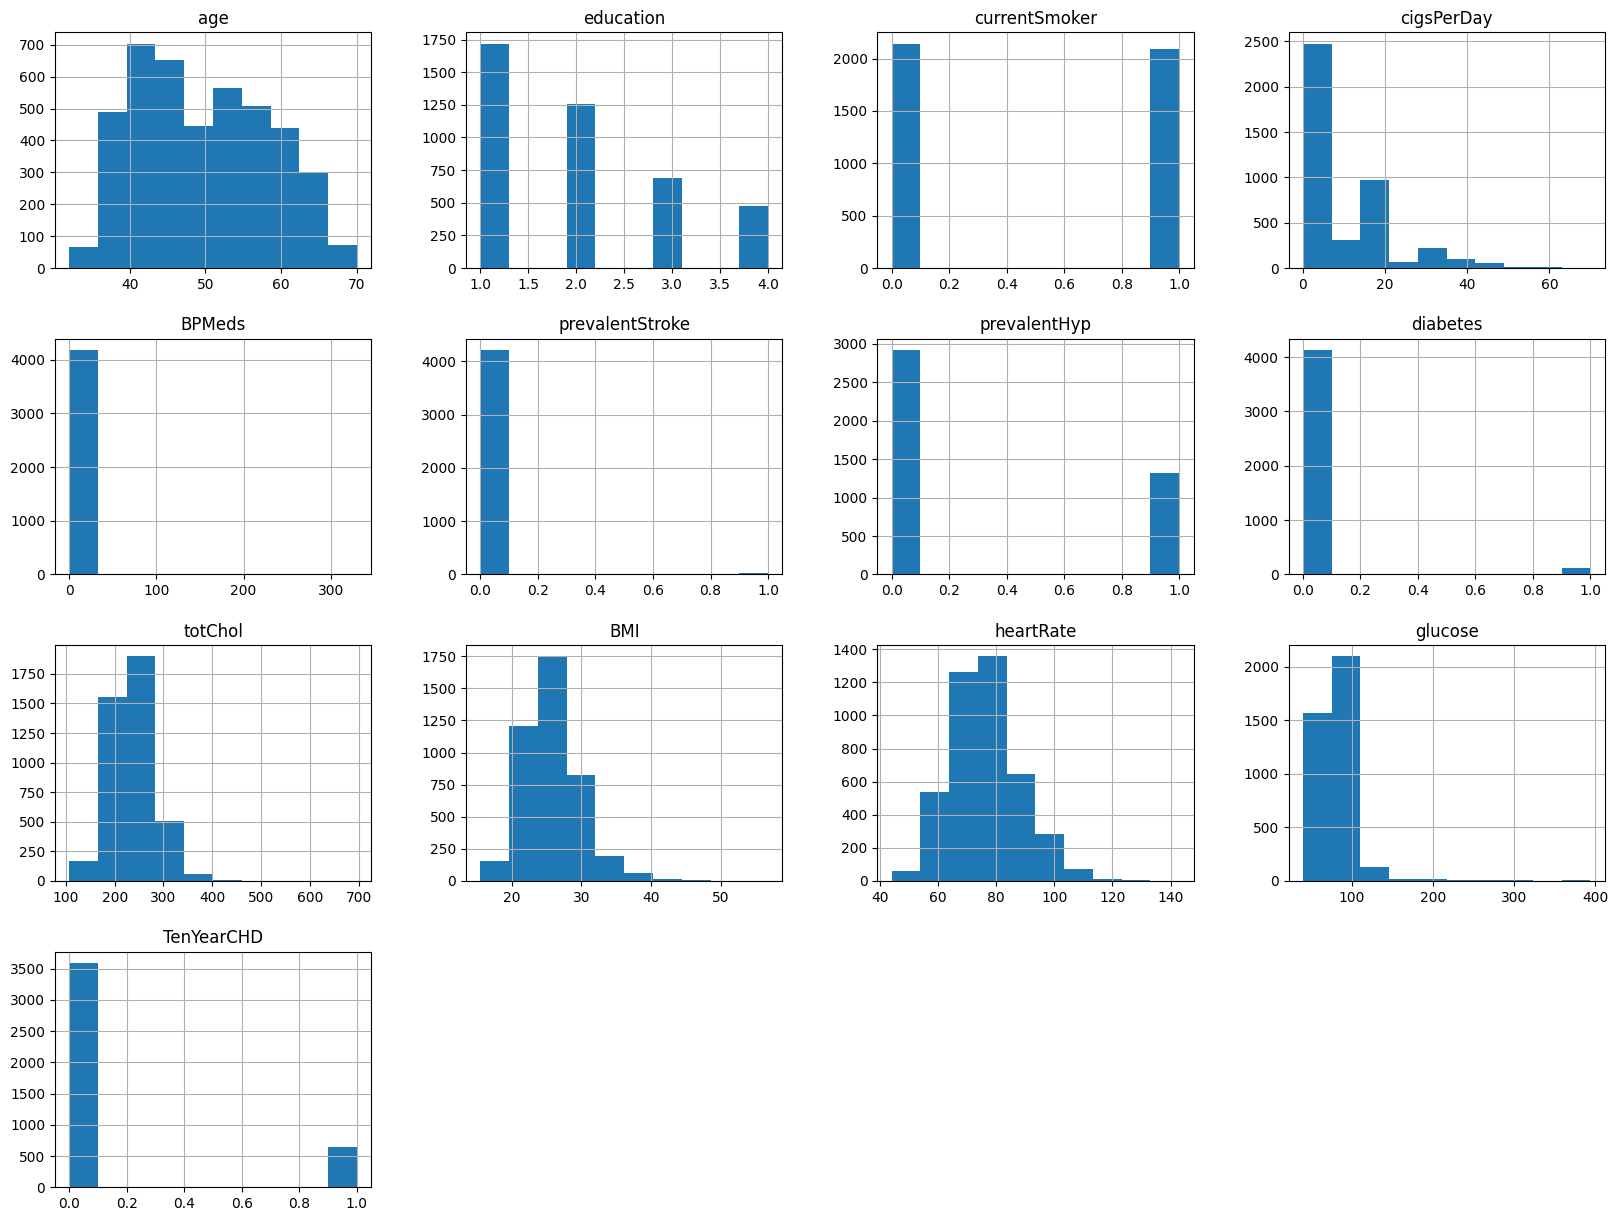

In [16]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

**Pair Plots**

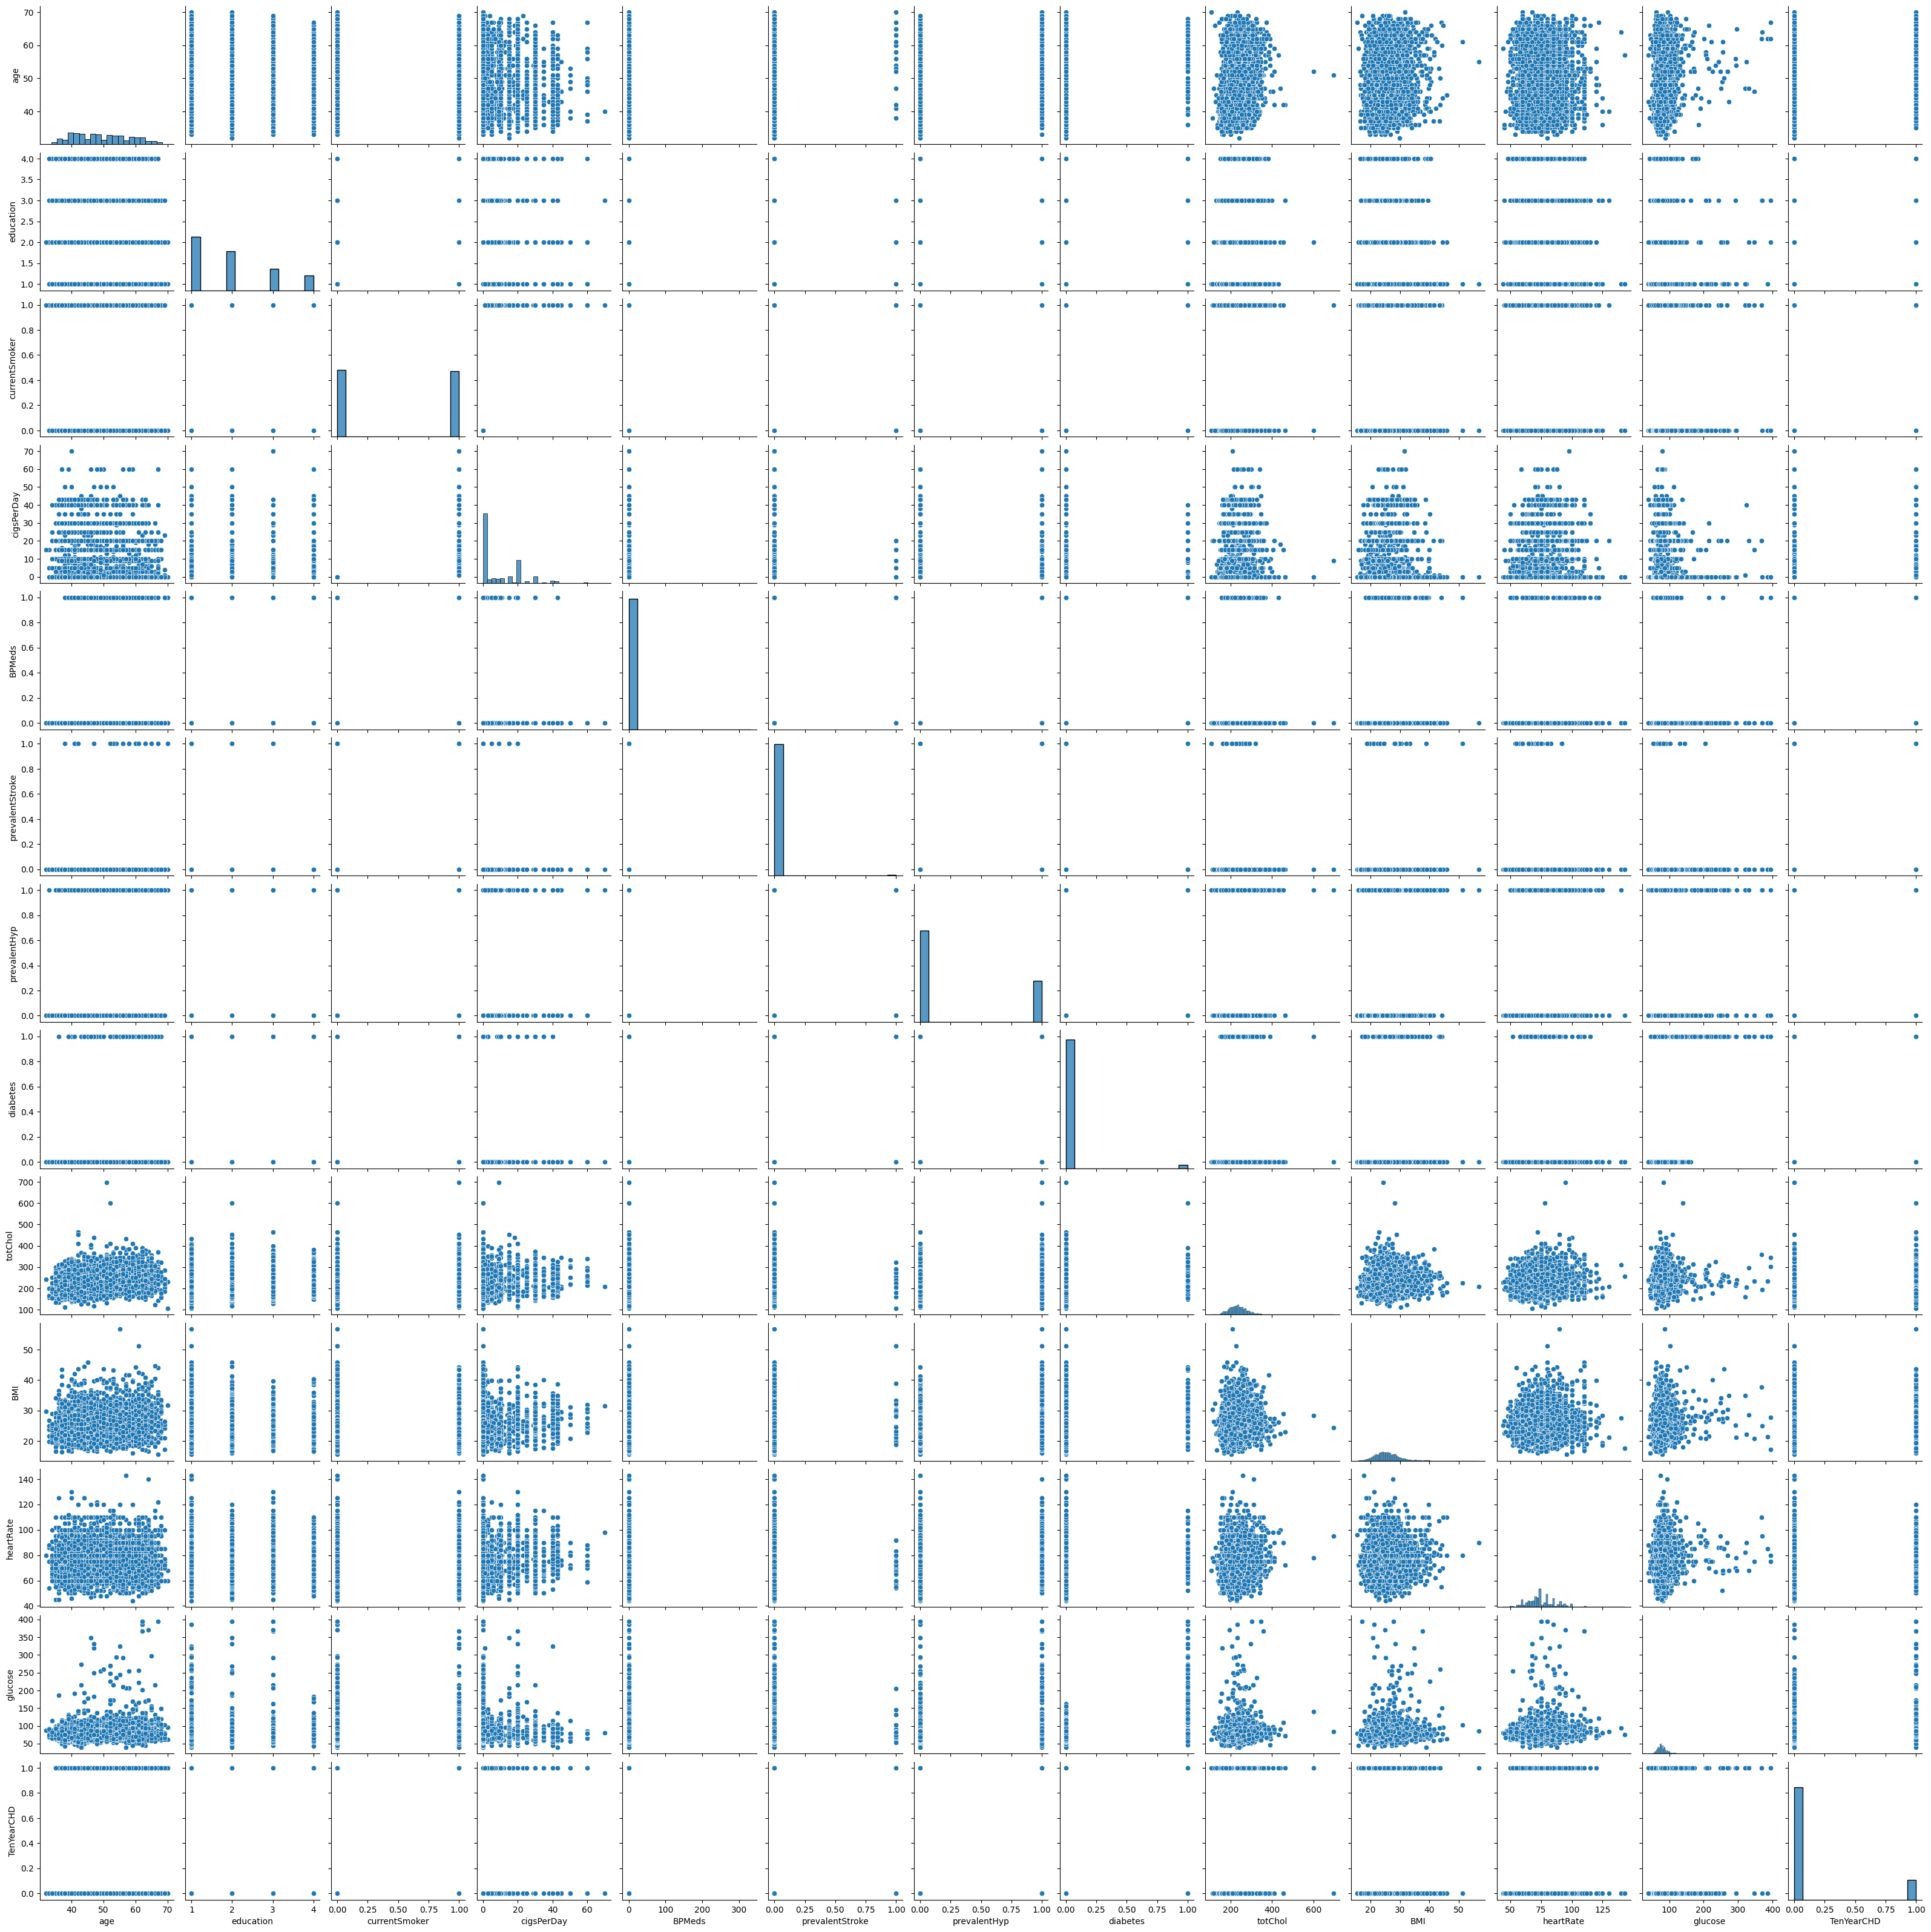

In [17]:
sns.pairplot(data)

**Scatter Plot**

<Axes: ylabel='heartRate'>

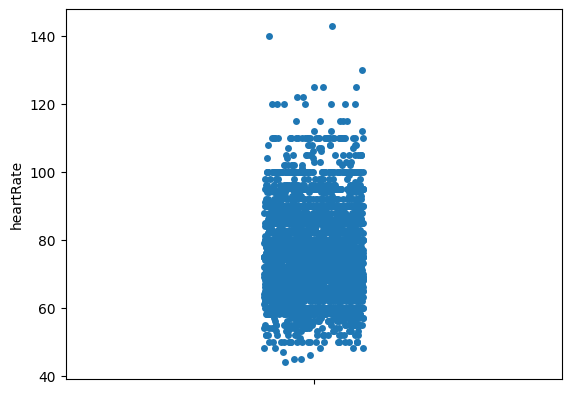

In [18]:
sns.stripplot(data['heartRate'])

<Axes: ylabel='age'>

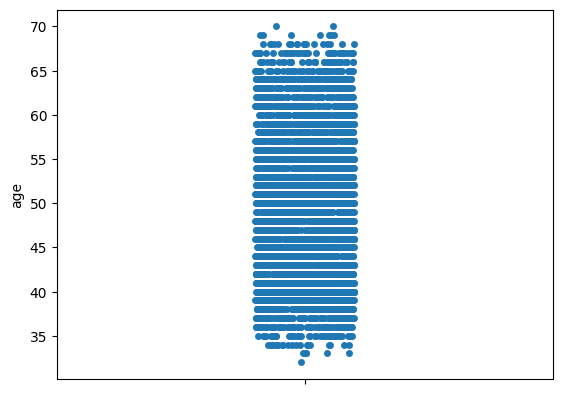

In [19]:
sns.stripplot(data['age'])

<Axes: ylabel='BMI'>

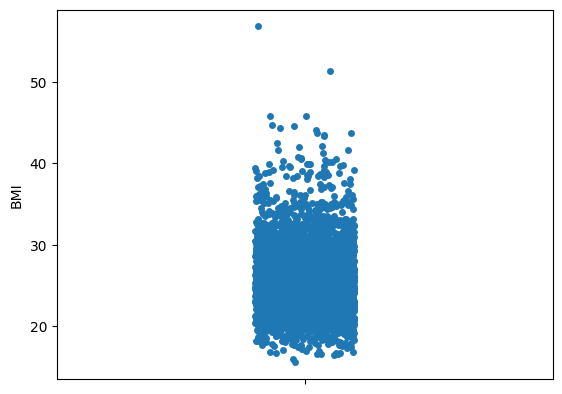

In [20]:
sns.stripplot(data['BMI'])

<Axes: ylabel='TenYearCHD'>

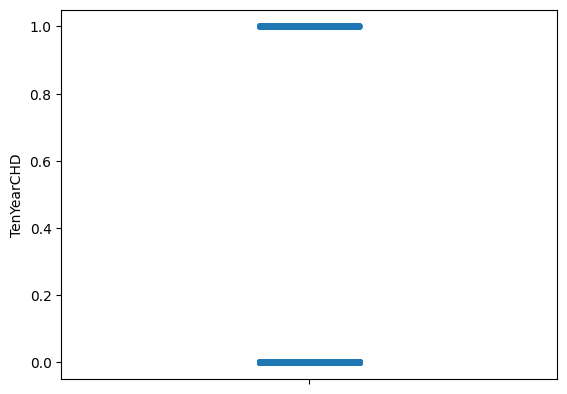

In [21]:
sns.stripplot(data['TenYearCHD'])

In [22]:
for i in ['gender']:
  data[i]=data[i].fillna(data[i].mode)

In [23]:
data.isna().sum()

gender               0
age                  2
education          107
currentSmoker        2
cigsPerDay          31
BPMeds              54
prevalentStroke      2
prevalentHyp         2
diabetes             2
totChol             52
BMI                 21
heartRate            3
glucose            390
TenYearCHD           2
dtype: int64

In [24]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [25]:
for i in ['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']:
  data[i]=data[i].fillna(data[i].median())

In [26]:
data.isna().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
data.dtypes

gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

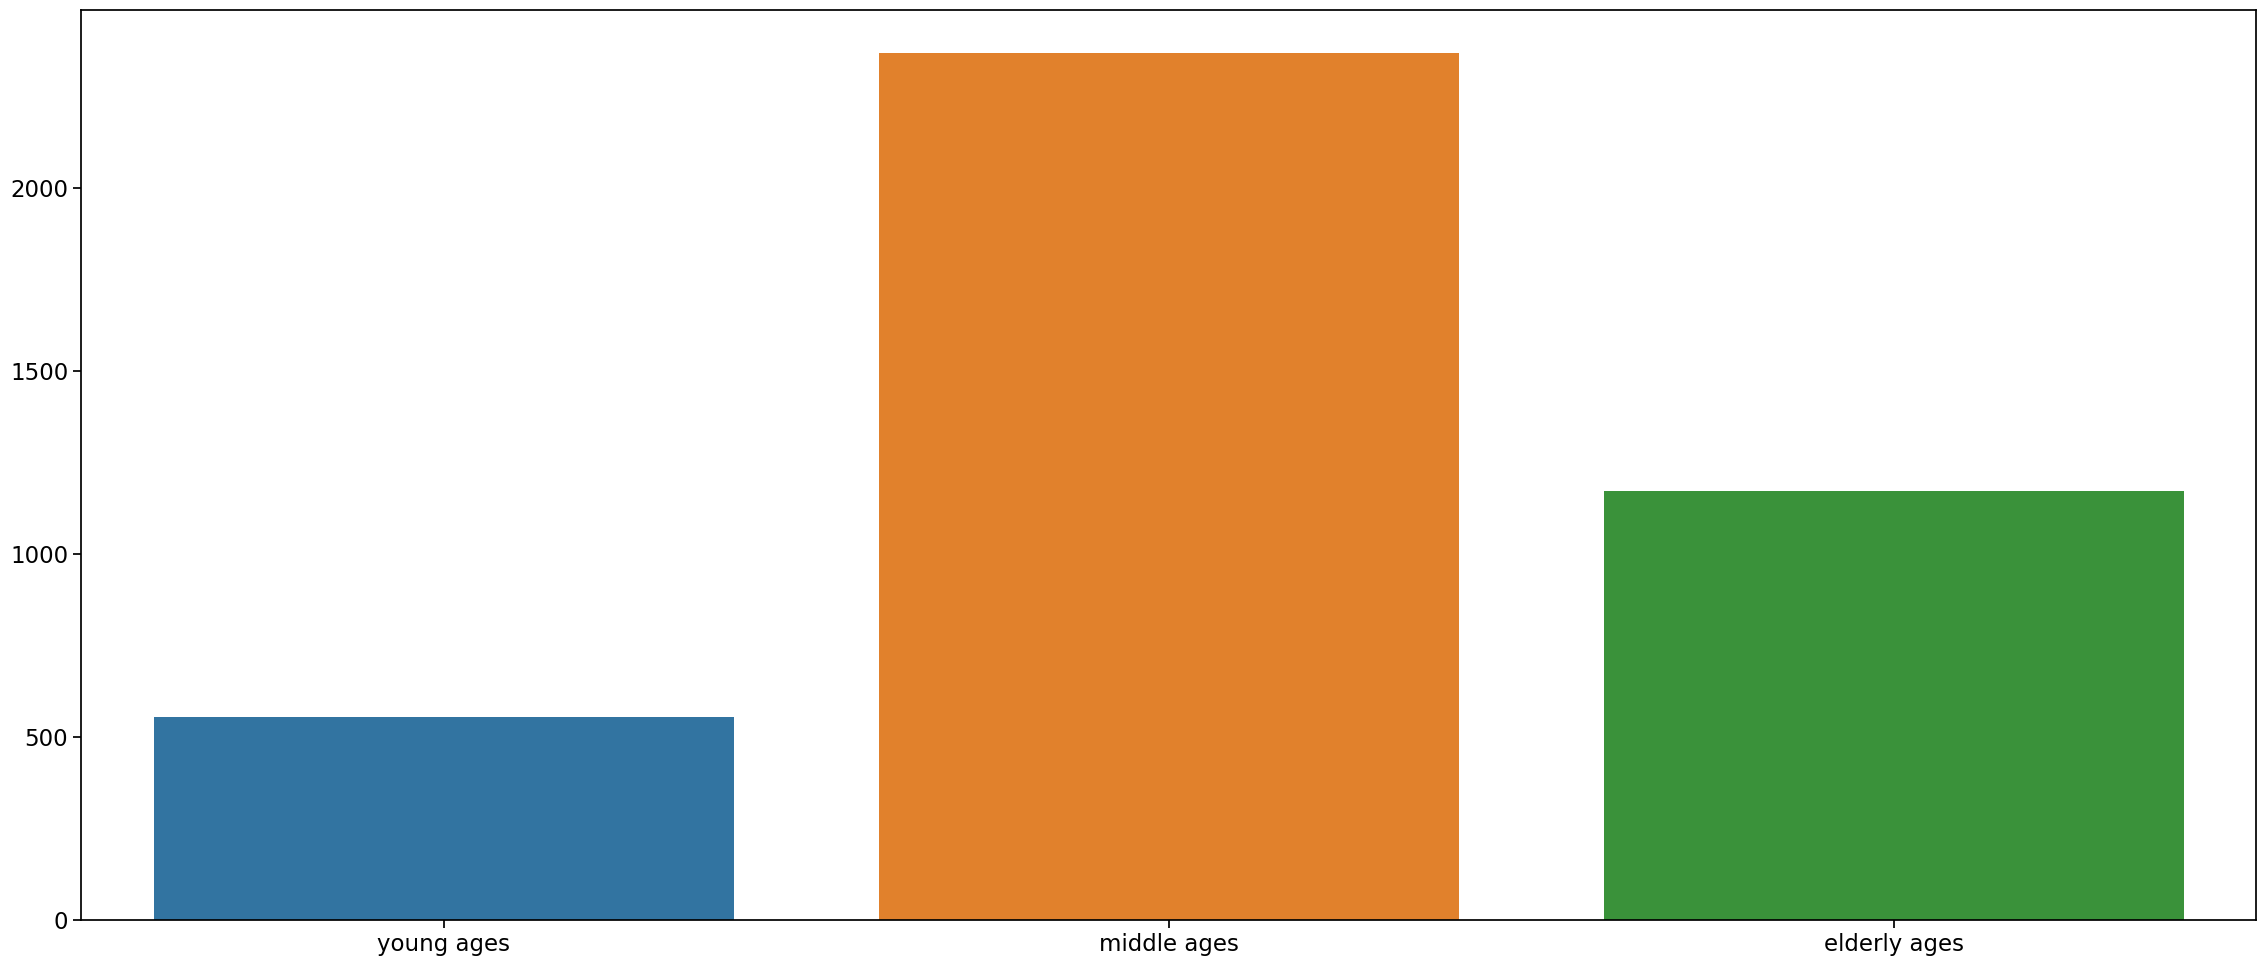

In [28]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

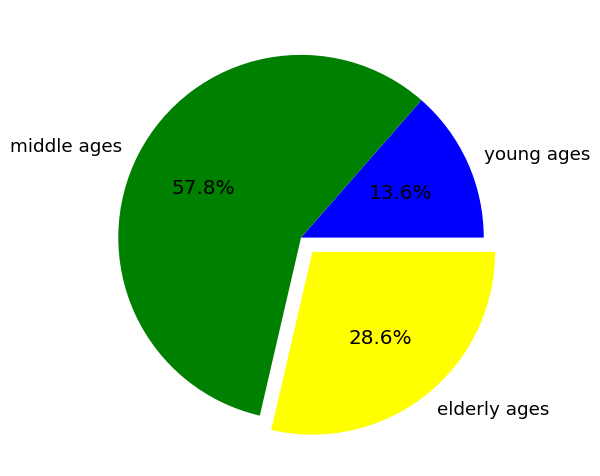

In [29]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [31]:
data['gender']=label_encoder.fit_transform(data['gender'].astype(str))

In [32]:
data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,23.10,85.0,85.0,0.0


In [33]:
data.dtypes

gender               int64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [34]:
data.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.867689,49.584670,1.979481,0.493868,8.937264,0.107075,0.005896,0.310377,0.025708,236.688208,25.800017,75.878302,81.601887,0.151887
std,1.195530,8.570147,1.006843,0.500021,11.901175,5.070287,0.076569,0.462703,0.158280,44.317007,4.070090,12.022363,22.859985,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,28.032500,83.000000,85.000000,0.000000
max,3.000000,70.000000,4.000000,1.000000,70.000000,330.000000,1.000000,1.000000,1.000000,696.000000,56.800000,143.000000,394.000000,1.000000


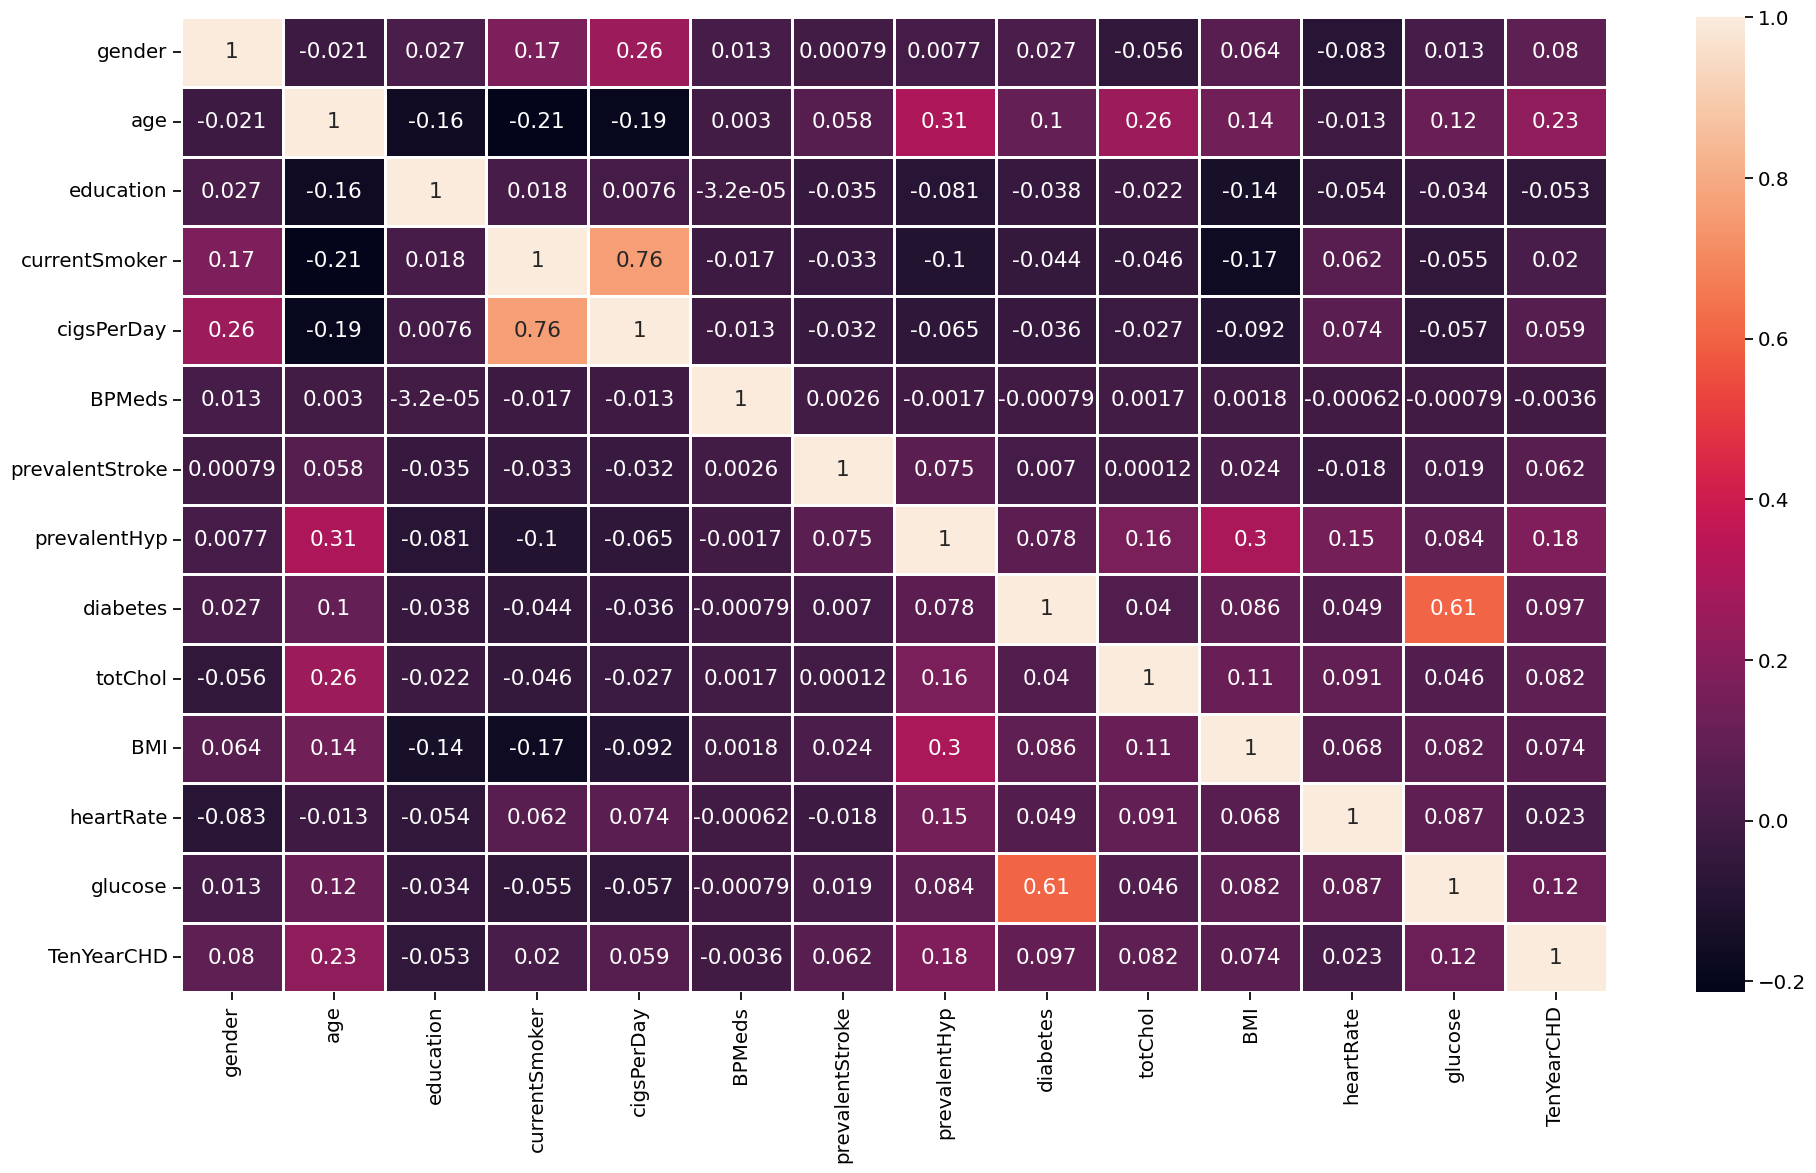

In [35]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

**Count Plot**

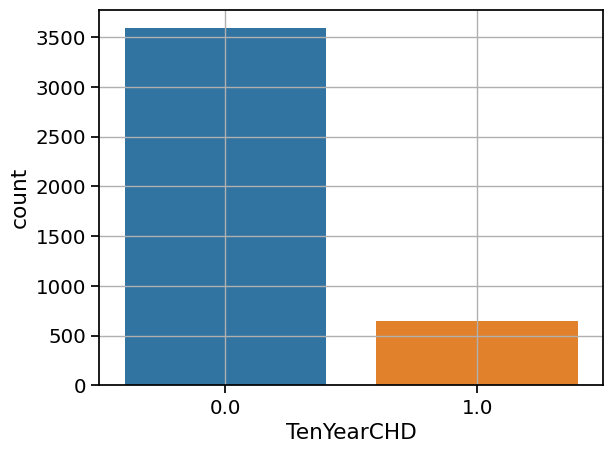

In [36]:
sns.countplot(x='TenYearCHD',data=data)
plt.grid()
plt.tight_layout()

**Min Max Scaling**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [39]:
data1=min_max_scaler.fit_transform(data)
data1

array([[0.33333333, 0.18421053, 1.        , ..., 0.36363636, 0.10451977,
        0.        ],
       [0.        , 0.36842105, 0.33333333, ..., 0.51515152, 0.10169492,
        0.        ],
       [0.33333333, 0.42105263, 0.        , ..., 0.31313131, 0.08474576,
        0.        ],
       ...,
       [0.        , 0.52631579, 0.33333333, ..., 0.36363636, 0.18926554,
        0.        ],
       [0.66666667, 0.44736842, 0.33333333, ..., 0.31313131, 0.10734463,
        0.        ],
       [0.66666667, 0.44736842, 0.33333333, ..., 0.31313131, 0.10734463,
        0.        ]])

In [40]:
type(data1)

numpy.ndarray

In [41]:
x=data.drop('TenYearCHD',axis=1)
y=data['TenYearCHD']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

**Stratified KFold Crossvalidation**

In [43]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(10)

In [44]:
for train_index,test_index in skfold_validator.split(x,y):
  print('Training Index: ',train_index)
  print('Testing Index: ',test_index)

Training Index:  [ 343  344  359 ... 4237 4238 4239]
Testing Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 22

**LogisticRegression**

In [83]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score is: ',accuracy_score(y_test,y_pred))
print('Precision score is: ',precision_score(y_test,y_pred))
print('Recall score is: ',recall_score(y_test,y_pred))
print('f1 score is: ',f1_score(y_test,y_pred))

Accuracy score is:  0.8561320754716981
Precision score is:  0.5555555555555556
Recall score is:  0.04065040650406504
f1 score is:  0.07575757575757576


In [47]:
accuracy_log=accuracy_score(y_test,y_pred)
print(accuracy_log)

0.8561320754716981


In [48]:
confusion_matrix(y_test,y_pred)

array([[721,   4],
       [118,   5]])

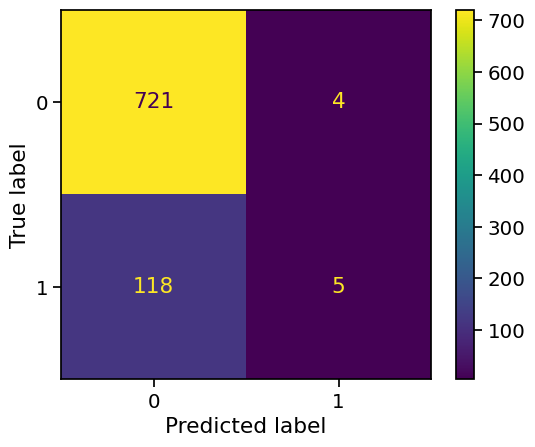

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

**kNN Model**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

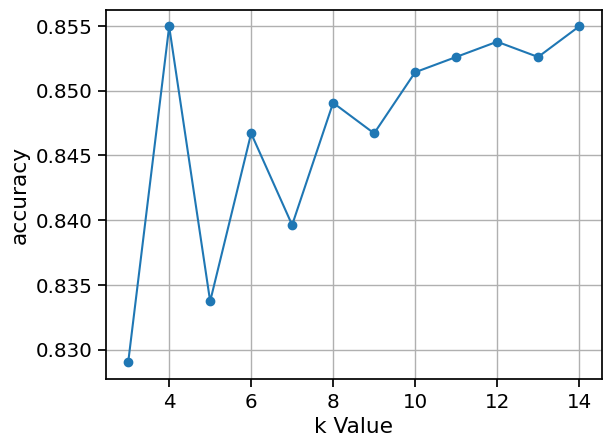

In [51]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [52]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred))
print('recall is: ',recall_score(y_test,y_pred))
print('f1 is: ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.8490566037735849
Precision is:  0.2727272727272727
recall is:  0.024390243902439025
f1 is:  0.04477611940298507


array([[717,   8],
       [120,   3]])

In [54]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.8490566037735849


In [55]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
metric_k

[0.8290094339622641,
 0.8549528301886793,
 0.8337264150943396,
 0.8466981132075472,
 0.839622641509434,
 0.8490566037735849,
 0.8466981132075472,
 0.8514150943396226,
 0.8525943396226415,
 0.8537735849056604,
 0.8525943396226415,
 0.8549528301886793,
 0.8490566037735849]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [58]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred))
print('Recall is: ',recall_score(y_test,y_pred))
print('f1 is: ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.8584905660377359
Precision is:  0.6363636363636364
Recall is:  0.056910569105691054
f1 is:  0.10447761194029852


array([[721,   4],
       [116,   7]])

In [60]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

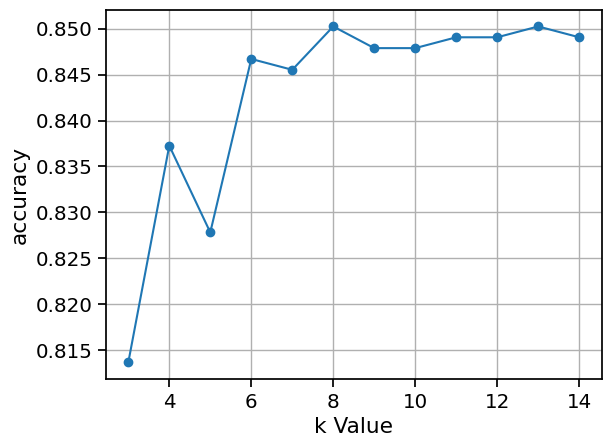

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [62]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred))
print('Recall is: ',recall_score(y_test,y_pred))
print('f1 is: ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.8502358490566038
Precision is:  0.35714285714285715
Recall is:  0.04065040650406504
f1 is:  0.072992700729927


array([[716,   9],
       [118,   5]])

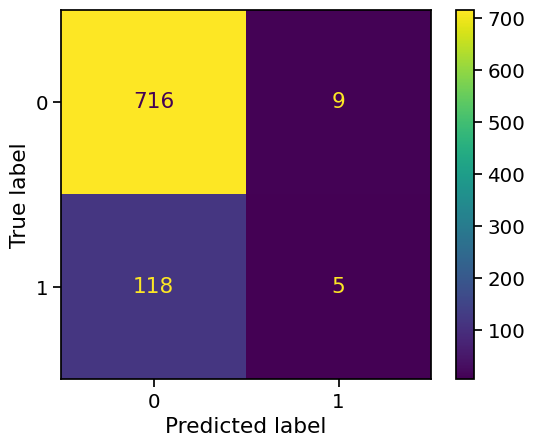

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

**SVM**

In [65]:
from sklearn.svm import SVC
svmcls=SVC(kernel='linear')
svmcls.fit(x_train,y_train)

SVC(kernel='linear')

In [66]:
y_pred=svmcls.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.8549528301886793


In [68]:
accuracy_svm=accuracy_score(y_test,y_pred)
print(accuracy_svm)

0.8549528301886793


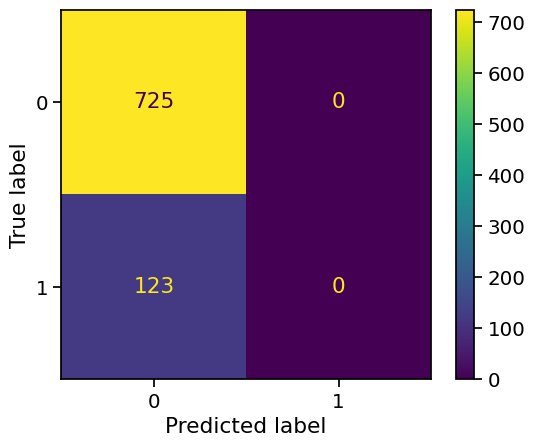

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

**Decision Tree**

In [70]:

from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)


In [71]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.7488207547169812


In [72]:
accuracy_dec=accuracy_score(y_test,y_pred)
print(accuracy_dec)

0.7488207547169812


In [73]:
print(confusion_matrix(y_test,y_pred))

[[602 123]
 [ 90  33]]


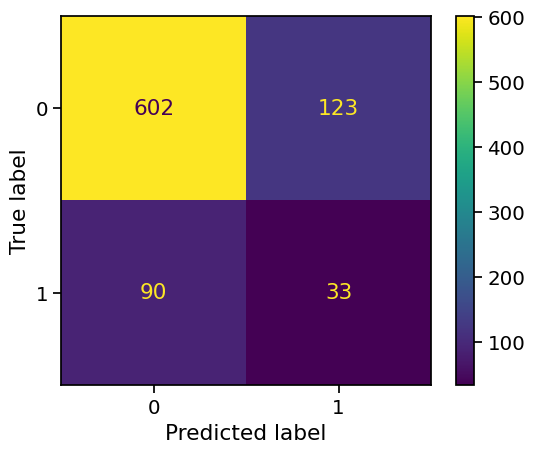

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

**Random Forest**

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [76]:

y_pred=rf_clf.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [77]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.8537735849056604
[[720   5]
 [119   4]]


In [78]:
accuracy_ran=accuracy_score(y_test,y_pred)
print(accuracy_ran)

0.8537735849056604


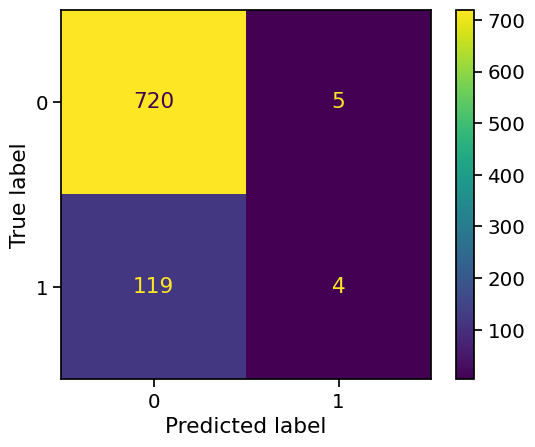

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

***Comparing Accuracy Of Different Models***

In [82]:
alg=['KNN','LogisticRegression','SVM','Decision Tree','Random Forest']
acc=[accuracy_KNN,accuracy_log,accuracy_svm,accuracy_dec,accuracy_ran]
Accuracy_Scores=pd.DataFrame({'Algorithms':alg,'Accuracy':acc})
Accuracy_Scores['Accuracy']=Accuracy_Scores['Accuracy']*100
Accuracy_Scores

,Algorithms,Accuracy
0,KNN,84.905660
1,LogisticRegression,85.613208
2,SVM,85.495283
3,Decision Tree,74.882075
4,Random Forest,85.377358
